In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
input_size=784
num_class=10
hidden_size=100
num_epochs=50
batch_size=100
learning_rate=0.001

In [4]:
#loading MNIST DataSet

train_dataset=torchvision.datasets.MNIST(root="./data",train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 144864619.65it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 97532764.75it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 61241057.63it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 943656.07it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [18]:
train_images = train_dataset.data.float()

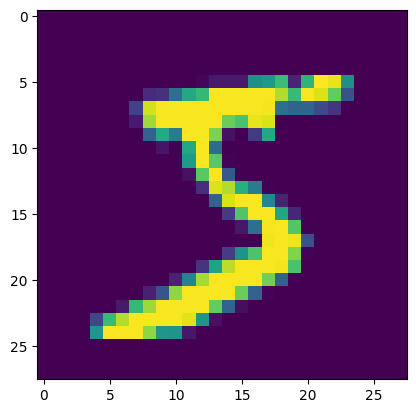

In [19]:
plt.imshow(train_images[0])

In [6]:
examples=iter(train_loader)
samples, labels=next(examples)

In [7]:
samples.shape

torch.Size([100, 1, 28, 28])

In [8]:
labels.shape

torch.Size([100])

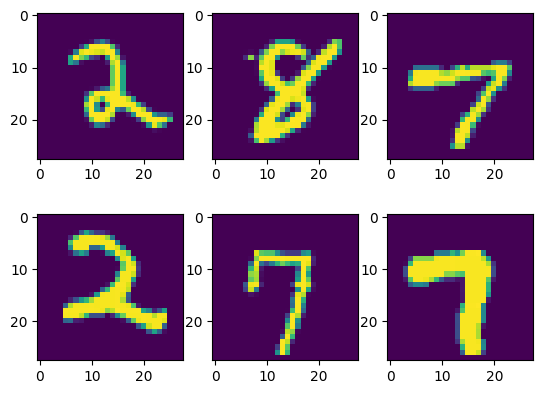

In [9]:
fig, axes = plt.subplots(2, 3)
for i, ax in enumerate(axes.flat):
  ax.imshow(samples[i][0])
plt.show()

In [10]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,output_size)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out



In [32]:
model=NeuralNet(input_size,hidden_size,num_class).to(device)

In [12]:
criterion=nn.CrossEntropyLoss() #this directly deals with Softmax layer so we don't need to add in the class
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [13]:
total_steps=len(train_loader)
total_steps

600

In [34]:
for epoch in range(num_epochs):
  for i,(image,labels ) in enumerate(train_loader):
    image=image.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(image)
    loss=criterion(image,labels)
    optimizer.zero_grad()
    loss.requires_grad = True

    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

Epoch [1/50], Step [100/600], Loss: 6.8531
Epoch [1/50], Step [200/600], Loss: 6.8513
Epoch [1/50], Step [300/600], Loss: 6.8494
Epoch [1/50], Step [400/600], Loss: 6.8562
Epoch [1/50], Step [500/600], Loss: 6.8480
Epoch [1/50], Step [600/600], Loss: 6.8606
Epoch [2/50], Step [100/600], Loss: 6.8566
Epoch [2/50], Step [200/600], Loss: 6.8461
Epoch [2/50], Step [300/600], Loss: 6.8473
Epoch [2/50], Step [400/600], Loss: 6.8559
Epoch [2/50], Step [500/600], Loss: 6.8478
Epoch [2/50], Step [600/600], Loss: 6.8455
Epoch [3/50], Step [100/600], Loss: 6.8478
Epoch [3/50], Step [200/600], Loss: 6.8451
Epoch [3/50], Step [300/600], Loss: 6.8526
Epoch [3/50], Step [400/600], Loss: 6.8441
Epoch [3/50], Step [500/600], Loss: 6.8526
Epoch [3/50], Step [600/600], Loss: 6.8523
Epoch [4/50], Step [100/600], Loss: 6.8568
Epoch [4/50], Step [200/600], Loss: 6.8619
Epoch [4/50], Step [300/600], Loss: 6.8518
Epoch [4/50], Step [400/600], Loss: 6.8520
Epoch [4/50], Step [500/600], Loss: 6.8528
Epoch [4/50

In [35]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 10.75 %
